In [1]:
import autorootcwd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from src.data import artificial, spam
from src.evaluation import evaluate, search_knn, search_rf, search_xgboost

In [2]:
X_a, y_a = artificial.prepare_data()
X_spam, y_spam = spam.prepare_data()

### Artificial

In [3]:
c_s = [(i+1)/10000 for i in range(10)]

scores_knn = []
scores_rf = []
scoeres_xgb = []
params_knn_a = []
params_rf_a = []
params_xgb_a = []
features = []
n_features = []

In [4]:
for c in c_s:
    print(f"_____ C={c} _____")
    lasso = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=5000)
    lasso.fit(X_a, y_a)

    sfm = SelectFromModel(lasso, prefit=True)
    X_selected = sfm.transform(X_a)
    selected_feature_indices = sfm.get_support(indices=True)
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_a, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_a, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_a, num_folds=10)

    scores = evaluate(X_selected, y_a, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.2)

    scores_knn.append(scores['KNN'][1])
    scores_rf.append(scores['RF'][1])
    scoeres_xgb.append(scores['XGB'][1])
    params_knn_a.append(params_knn)
    params_rf_a.append(params_rf)
    params_xgb_a.append(params_xgb)
    n_features.append(num_features)
    features.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=0.0001 _____
4 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.7755 | RF 0.758 | XGB 0.7535
_____ C=0.0002 _____
5 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8415000000000001 | RF 0.8165000000000001 | XGB 0.8065
_____ C=0.0003 _____
7 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8725 | RF 0.865 | XGB 0.8499999999999999
_____ C=0.0004 _____
9 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 fold

In [5]:
df = pd.DataFrame(data=np.array([n_features, scores_knn, scores_rf, scoeres_xgb]).transpose(), columns=["features", "knn", "rf", "xgb"])

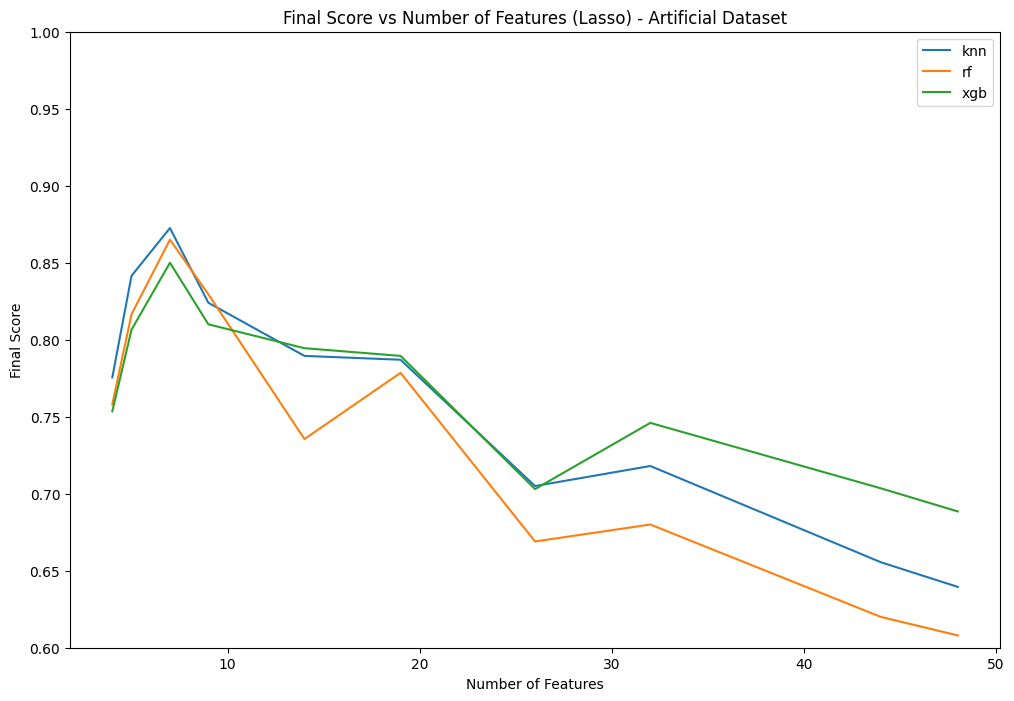

In [6]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (Lasso) - Artificial Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("artificial_lasso.png")
plt.show()

### Spam

In [7]:
a = [0.01, 0.013, 0.015, 0.017, 0.019, 0.021, 0.023, 0.025]
c_s = a + [(i+3)/100 for i in range(20)]

scores_knn_spam = []
scores_rf_spam = []
scoeres_xgb_spam = []
params_knn_spam = []
params_rf_spam = []
params_xgb_spam = []
features_spam = []
n_features_spam = []

In [9]:
for c in c_s:
    print(f"_____ C={c} _____")
    lasso = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=5000)
    lasso.fit(X_spam, y_spam)

    sfm = SelectFromModel(lasso, prefit=True)
    X_selected = sfm.transform(X_spam)
    selected_feature_indices = sfm.get_support(indices=True)
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_spam, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_spam, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_spam, num_folds=10)

    scores = evaluate(X_selected, y_spam, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.01)

    scores_knn_spam.append(scores['KNN'][1])
    scores_rf_spam.append(scores['RF'][1])
    scoeres_xgb_spam.append(scores['XGB'][1])
    params_knn_spam.append(params_knn)
    params_rf_spam.append(params_rf)
    params_xgb_spam.append(params_xgb)
    n_features_spam.append(num_features)
    features_spam.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=0.01 _____
4 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.775283959902393 | RF 0.743406757370139 | XGB 0.742966512422216
_____ C=0.013 _____
7 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8031190155509537 | RF 0.8108877350508749 | XGB 0.8093233880281776
_____ C=0.015 _____
10 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8311946814198251 | RF 0.8419044335881019 | XGB 0.8304836560519141
_____ C=0.017 _____
11 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 

In [10]:
df = pd.DataFrame(data=np.array([n_features_spam, scores_knn_spam, scores_rf_spam, scoeres_xgb_spam]).transpose(), columns=["features", "knn", "rf", "xgb"])

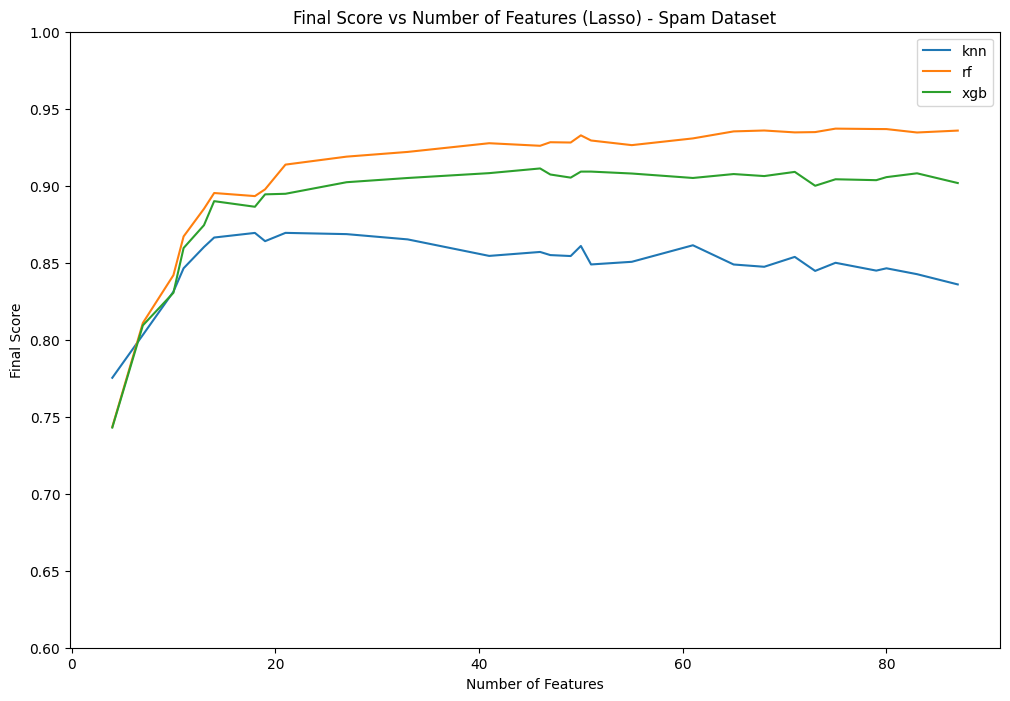

In [11]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (Lasso) - Spam Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("spam_lasso.png")
plt.show()

### Artificial analysis

In [13]:
print(scores_rf[2])
print(params_rf_a[2])

0.865
{'n_estimators': 300}


In [14]:
print(features[2])

[105 336 338 378 442 475 493]


In [22]:
print(n_features[2])

7


### Spam analysis

In [15]:
print(np.array(scores_rf_spam).max())
print(np.array(scores_rf_spam).argmax())

0.9370755278859456
23


In [16]:

print(scores_rf_spam[23])
print(params_rf_spam[23])

0.9370755278859456
{'n_estimators': 200}


In [17]:
print(features_spam[23])

[ 255  302  318  533  942 1130 1181 1602 1632 1655 1700 1769 1851 1909
 1932 1937 2129 2428 3005 3047 3082 3269 3330 3431 3439 3590 3605 3671
 3712 3821 3833 3840 4113 4252 4340 4500 4548 4574 4635 4706 4758 4857
 4945 5017 5034 5076 5110 5357 5535 5748 5845 5919 6149 6171 6406 6426
 6641 6943 6969 7014 7093 7120 7256 7284 7357 7360 7555 7583 7664 7691
 7718 7747 7811 7872 7877]


In [23]:
print(n_features_spam[23])

75


### Results

In [24]:
data_ = [
    {"dataset_name": "artificial", "feature_selection_method": "lasso", "classifier":"RF", "best_num_features": 7, "best_score": 0.865},
    {"dataset_name": "spam", "feature_selection_method": "lasso", "classifier":"RF", "best_num_features": 75, "best_score": 0.9370755278859456}
]

df_ = pd.DataFrame(data_, columns=["dataset_name", "feature_selection_method", "classifier", "best_num_features", "best_score"])
df_.to_csv("results/lasso_results.csv", index=False)